In [4]:
from api_wrappers.kraken_wrapper import KrakenWrapper

wrapper = KrakenWrapper(lb_interval="1day")

all_assets = wrapper.get_assets("USD")
print(len(all_assets))
for asset in all_assets:
    print(asset + "\n")

474
1INCHUSD

AAVEUSD

ABUSD

ACAUSD

ACHUSD

ACTUSD

ACXUSD

ADAUSD

ADXUSD

AEROUSD

AEVOUSD

AGLDUSD

AI16ZUSD

AIOZUSD

AIRUSD

AIXBTUSD

AKTUSD

ALCHUSD

ALCXUSD

ALGOUSD

ALICEUSD

ALPHAUSD

ALTUSD

ANKRUSD

ANLOGUSD

ANONUSD

APENFTUSD

APEUSD

API3USD

APTUSD

APUUSD

ARBUSD

ARCUSD

ARKMUSD

ARPAUSD

ARUSD

ASRRUSD

ASTRUSD

ATHUSD

ATLASUSD

ATOMUSD

AUCTIONUSD

AUDIOUSD

AUDUSD

AURAUSD

AUSD

AVAAIUSD

AVAXUSD

AXSUSD

B3USD

BABYUSD

BADGERUSD

BALUSD

BANANAS31USD

BANDUSD

BATUSD

BCHUSD

BDXNUSD

BEAMUSD

BERAUSD

BICOUSD

BIGTIMEUSD

BIOUSD

BITUSD

BLURUSD

BLZUSD

BMTUSD

BNBUSD

BNCUSD

BNTUSD

BOBAUSD

BODENUSD

BONDUSD

BONKUSD

BRICKUSD

BSXUSD

BTTUSD

C98USD

CAKEUSD

CATUSD

CCDUSD

CELOUSD

CELRUSD

CFGUSD

CHEEMSUSD

CHEXUSD

CHILLHOUSEUSD

CHRUSD

CHZUSD

CLANKERUSD

CLOUDUSD

CLVUSD

CMETHUSD

COMPUSD

COOKIEUSD

COQUSD

CORNUSD

COTIUSD

COWUSD

CPOOLUSD

CQTUSD

CROUSD

CRVUSD

CSMUSD

CTSIUSD

CVCUSD

CVXUSD

CXTUSD

CYBERUSD

DAIUSD

DASHUSD

DBRUSD

D

In [ ]:
hist_dict = wrapper.pull_kraken_hist_usd_simple()

KeyboardInterrupt: 

In [81]:
test_key = list(hist_dict.keys())[55]
test_result = hist_dict[test_key]

print(test_key)
for row in test_result:
    print(row[-2])

BCHUSD
6449.68272482
3003.29883757
2317.76250544
1716.34433267
409.09656463
1378.46424255
1227.84527346
3477.36146195
5994.53728082
18979.79466001
7069.54457153
1870.73294117
1607.62922893
3473.22257987
2604.14821309
2480.82713818
933.89218111
1369.96416206
325.36286839
2086.55899303
4635.30824744
13515.65400352
5348.77790548
8962.23946930
2932.22627111
1566.22662184
1456.10244949
2486.18917765
1029.52812527
839.33650895
700.49395208
1126.37847430
957.49566911
2638.61952922
1827.30885540
7695.04741298
4255.40476733
3122.35386355
6909.10642338
2401.26677169
2199.32871213
4124.81740922
3041.88846507
4533.15521838
5034.78304528
3096.37800867
2239.69607945
816.68415431
2873.90233876
2907.89418242
11453.03828252
10018.30233154
6765.08893140
1749.91850599
5087.77409241
7276.75862103
5771.35434377
3430.52001657
2318.12580826
2372.85644975
2561.55237948
1291.63192944
3695.40586605
1964.93045157
3101.33858968
3302.33838522
3241.19522801
1191.98555390
788.28308265
12255.24185988
2829.62862633
22

In [82]:
import pandas as pd
bar_data_names = ["date","open","high","low","close","vwap","volume","drop"]
df = pd.DataFrame(test_result, columns=bar_data_names)
print(df.head())

         date    open    high     low   close    vwap         volume  drop
0  1691452800  237.40  248.97  234.81  237.83  241.18  6449.68272482  3301
1  1691539200  238.53  239.38  233.57  238.64  236.03  3003.29883757  1534
2  1691625600  238.60  240.36  230.33  232.04  235.21  2317.76250544  1133
3  1691712000  231.73  232.74  227.08  228.99  229.21  1716.34433267   984
4  1691798400  228.87  230.40  227.32  228.49  228.77   409.09656463   596


Mean: 0.0008114250906679704


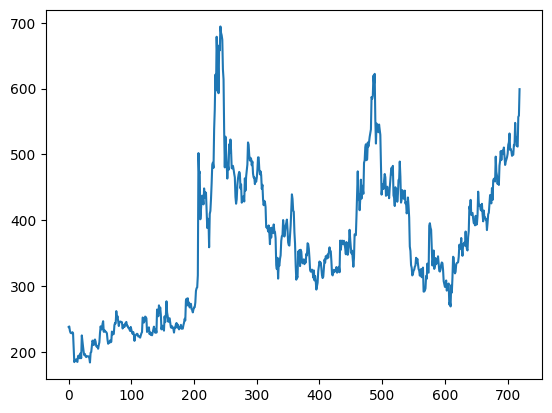

In [83]:
import numpy as np
import matplotlib.pyplot as plt
df['close'] = pd.to_numeric(df['close'], errors='coerce')
log_returns = np.log(df['close'][:-50]).diff().dropna()

plt.plot(df['close'])

print("Mean:", log_returns.mean())

In [84]:
sigma = log_returns.std()

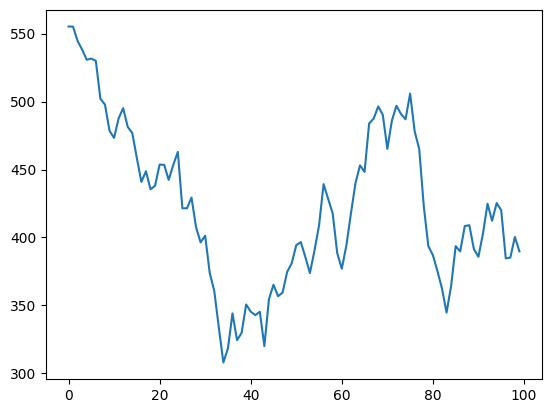

In [85]:
from utils.synthetic_data_service import SyntheticOHLCVGenerator


dg = SyntheticOHLCVGenerator(
    mu=log_returns.mean(),
    sigma=sigma,
    dt=1,  # If your data is daily, dt=1
    n_steps=100,  # Number of data points to generate
    seed=89,  # For reproducibility
    #start_price=df['close'].iloc[-1]  # Start from the last close price
)

test_data = dg.generate(start=df['close'].iloc[-1])
df_test = pd.DataFrame(test_data, columns=bar_data_names)

plt.plot(df_test['close'])



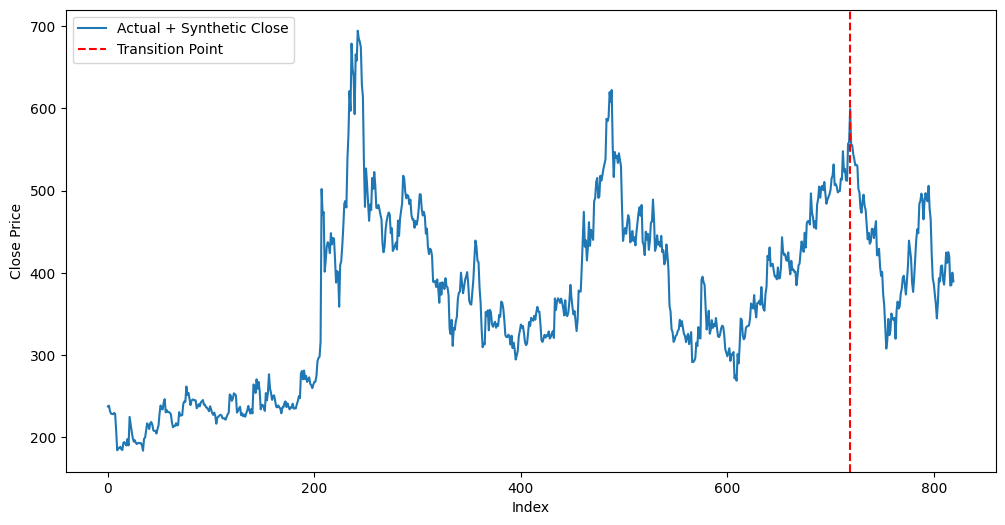

In [86]:
# Ensure both DataFrames have the same columns and index order
df = df.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Concatenate real and synthetic data
combined_df = pd.concat([df, df_test], ignore_index=True)

# Plot the combined close prices
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(combined_df['close'], label='Actual + Synthetic Close')
plt.axvline(len(df)-1, color='red', linestyle='--', label='Transition Point')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

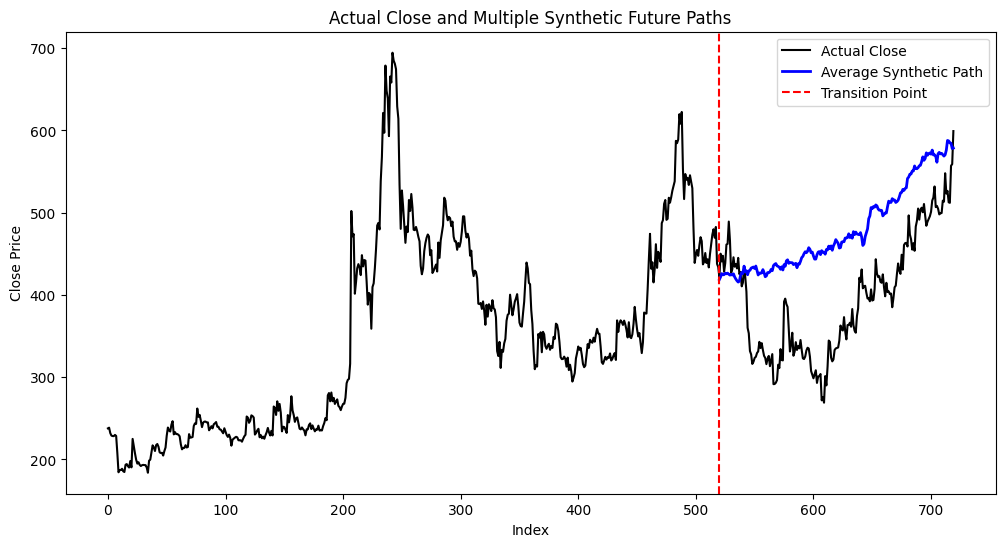

In [90]:
# Number of synthetic paths to generate
seeds = [21, 42, 63, 84, 105, 126, 147, 168, 189, 210]  # Different seeds for variety
seeds = range(100, 100 + 34)
num_paths = len(seeds)
gen_start = 200  # Start generating synthetic paths from the last 100 points of actual data
synthetic_paths = []

for seed in seeds:
    dg = SyntheticOHLCVGenerator(
        mu=log_returns.mean(),
        sigma=sigma,
        dt=1,
        n_steps=gen_start,
        seed=seed
    )
    test_data = dg.generate(start=df['close'].iloc[-gen_start])
    synthetic_paths.append(test_data['close'].values)

# Plot actual data
plt.figure(figsize=(12, 6))
plt.plot(df['close'], color='black', label='Actual Close')

# Plot all synthetic paths

'''for i, path in enumerate(synthetic_paths):
    plt.plot(range(len(df)-50, len(df) + len(path)-50), path, alpha=0.6, label=f'Path {i+1}' if i == 0 else None)'''

# Convert list of arrays to a 2D NumPy array
paths_array = np.array(synthetic_paths)  # shape: (num_paths, n_steps)

# Calculate the average path
avg_path = paths_array.mean(axis=0)
# Plot the average synthetic path
plt.plot(range(len(df)-gen_start, len(df) + len(avg_path) - gen_start), avg_path, color='blue', linewidth=2, label='Average Synthetic Path')


plt.axvline(len(df)-gen_start, color='red', linestyle='--', label='Transition Point')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.title('Actual Close and Multiple Synthetic Future Paths')
plt.show()